# Data Science Essentials: GeoPandas
    <Name> Rebecah Kwak
    <Class> vol3 lab
    <Date> Week 4

In [166]:
!pip install geopandas

In [167]:
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

## Problem 1

Read in the file *airports.csv* as a pandas dataframe.
Create three convex hulls around the three sets of airports listed below.
This can be done by passing in lists of the airports' coordinates to a *shapely.geometry.Polygon* object.

1. Maio Airport, Scatsta Airport, Stokmarknes Skagen Airport, Bekily Airport, K. D. Matanzima Airport, RAF Ascension Island
2. Oiapoque Airport, Maio Airport, Zhezkazgan Airport, Walton Airport, RAF Ascension Island, Usiminas Airport, Piloto Osvaldo Marques Dias Airport
3. Zhezkazgan Airport, Khanty Mansiysk Airport, Novy Urengoy Airport, Kalay Airport, Biju Patnaik Airport, Walton Airport
	
Create a new GeoDataFrame with these three Polygons as entries.
Plot this GeoDataFrame on top of an outlined world map.

In [168]:
first_set = ['Maio Airport', 'Scatsta Airport', 'Stokmarknes Skagen Airport',
                 'Bekily Airport','K. D. Matanzima Airport', 'RAF Ascension Island']
second_set = ['Oiapoque Airport','Maio Airport', 'Zhezkazgan Airport',
                'Walton Airport','RAF Ascension Island','Usiminas Airport',
                 'Piloto Osvaldo Marques Dias Airport']
third_set = ['Zhezkazgan Airport','Khanty Mansiysk Airport','Novy Urengoy Airport',
                 'Kalay Airport','Biju Patnaik Airport','Walton Airport']

Text(0.5, 1.0, 'Problem1 plot on the world map')

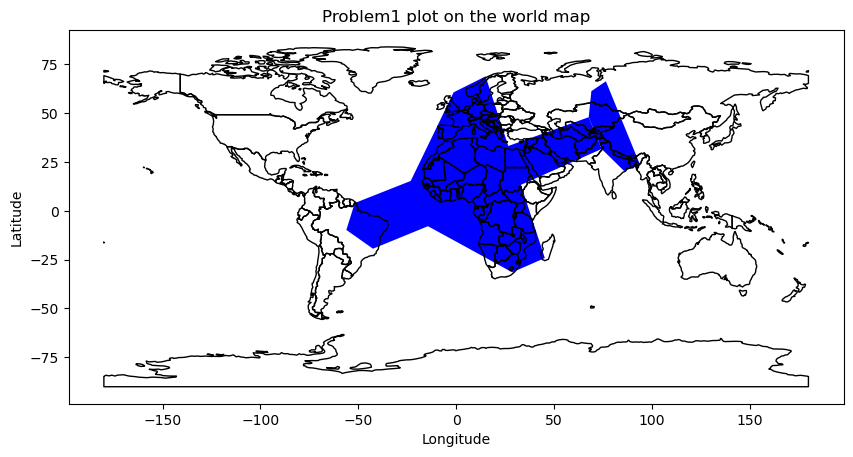

In [169]:
#reading the file airports.csv as a pandas DataFrame
airports = pd.read_csv('airports.csv', index_col = 'Name')
#plotting the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10,7), ncols = 1, nrows= 1)
base = world.boundary.plot(edgecolor = 'black', ax = ax, linewidth =1)


#creating the polygons
airports['Coordinates'] = list(zip(airports.Longitude,airports.Latitude))
first = Polygon(airports.loc[first_set]['Coordinates'])
second = Polygon(airports.loc[second_set]['Coordinates'])
third = Polygon(airports.loc[third_set]['Coordinates'])

#plotting the airplane
airports = gpd.GeoDataFrame({'geometry':[first,second,third]})
airports.plot(ax=base,marker='o', color = 'blue', markersize= 1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Problem1 plot on the world map')

## Problem 2
Use the command *geopandas.read_file('county_data.gpkg')* to create a GeoDataFrame of information about US counties.
Each county's shape is stored in the *geometry* column.
Use this to **plot the outlines of all US counties two times**, first using the default CRS and then using EPSG:5071.

Next, create a new GeoDataFrame that combines all counties within a single state.
Drop states with the following STATEFP codes: 02, 15, 60, 66, 69, 72, 78.
Plot this GeoDataFrame to see an outline of the 48 contiguous states.
Ensure a CRS of 5071.

Text(0.5, 1.0, 'Plotting after dropping the states')

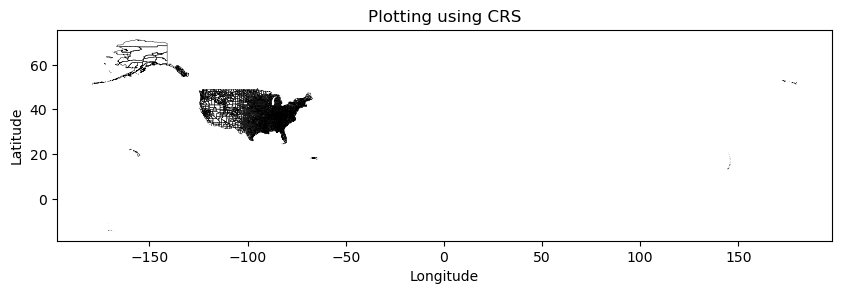

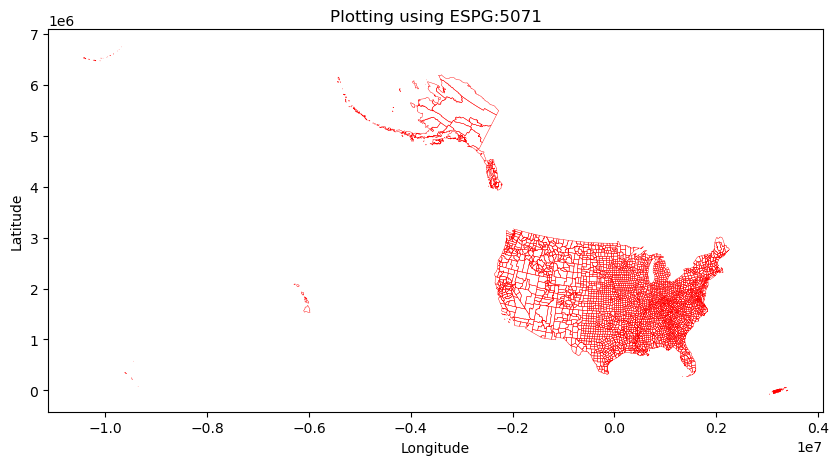

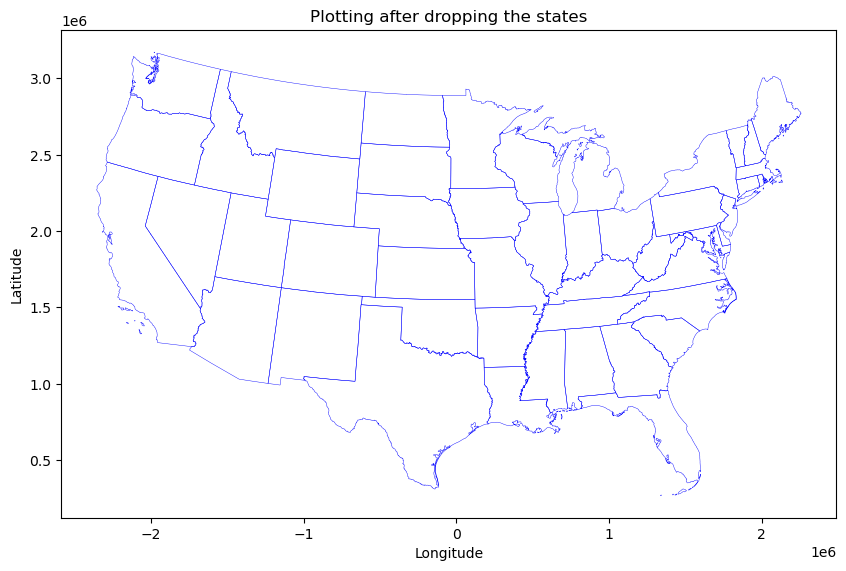

In [170]:
#reading the data
county_df = gpd.read_file('county_data.gpkg')
county_df.set_index(['STATEFP'],inplace=True)

#plotting the world using CRS
fig, ax = plt.subplots(figsize=(10,7), ncols = 1, nrows= 1)
base = county_df.boundary.plot(edgecolor = 'black', ax = ax, linewidth =.3)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Plotting using CRS')

#plotting the world using ESPG:5071
CRS = county_df.to_crs(5071, inplace=True)
fig, ax = plt.subplots(figsize=(10,7), ncols = 1, nrows= 1)
base = county_df.boundary.plot(edgecolor = 'red', ax = ax, linewidth =.3)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Plotting using ESPG:5071')

#Dropping states
mod_states = county_df.drop(index = ['02','15','60','66','69','72','78'])
mod_states = mod_states.dissolve(by = 'STATEFP')

#plotting the states after ensuring a CRS of 5071
CRS = mod_states.to_crs(5071, inplace=True)
fig, ax = plt.subplots(figsize=(10,7), ncols = 1, nrows= 1)
base = mod_states.boundary.plot(edgecolor = 'blue', ax = ax, linewidth =.3)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Plotting after dropping the states')

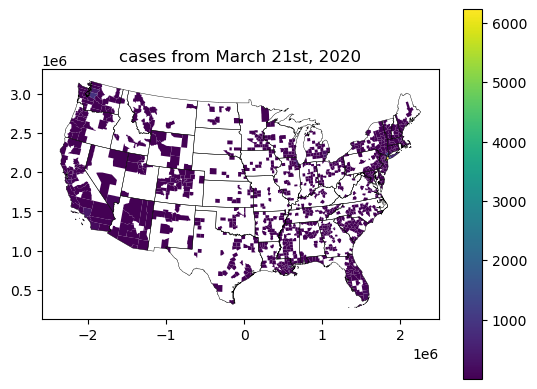

In [171]:
#get the nytimes data
nytimes = pd.read_csv('nytimes.csv')
nytimes['date'] = pd.to_datetime(nytimes['date'])
nytimes['DATES'] = nytimes['date']
nytimes = nytimes.set_index('date')
nytimes = nytimes.loc['2020-03-21']

county_df = gpd.read_file('county_data.gpkg')
#get the county data together to mege
county_df['fips'] = county_df['STATEFP'] + county_df['COUNTYFP']
county_df = county_df.astype({'fips':'float'})

#merge the datas
together = county_df.merge(nytimes, on = 'fips')
#ignoring the unknwon FIPS codes and Hawaii and Alaska
together = together[~together['state'].isin(['Hawaii','Alaska'])]
together = together[together['fips'] != 0]

#plotting the states after ensuring a CRS of 5071
CRS = county_df.to_crs(5071, inplace=True)
together = gpd.GeoDataFrame(together)
fig,ax = plt.subplots(ncols=1, nrows = 1)

base = country_df.boundary.plot(edgecolor = 'black', ax = ax, linewidth =.3)
together.to_crs(epsg=5071).plot(ax=base,column = 'cases', markersize= 1,legend=True)

plt.title('cases from March 21st, 2020')
plt.show()

## Problem 4

As in Problem 3, plot your state outline map together with a map of Covid-19 cases from March 21, 2020.
This time, use a log scale.
Use EPSG:5071.
Pick a good colormap and be sure to display a colorbar.

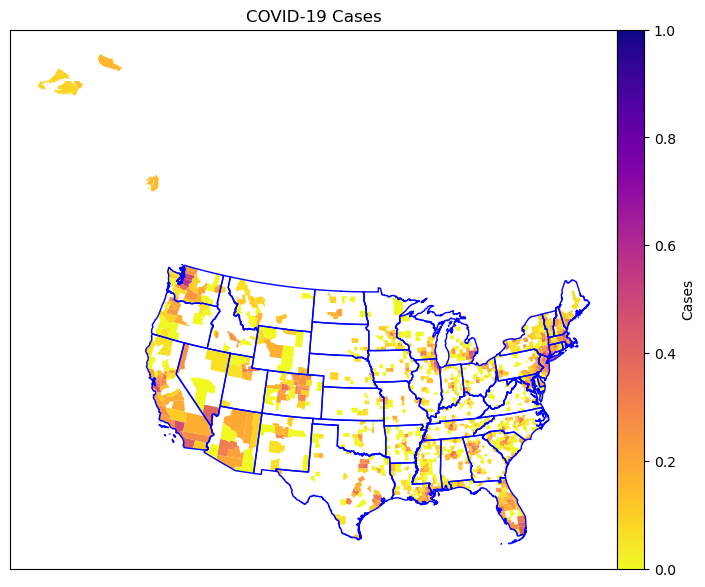

In [172]:
#Set the norm using data bounds
fig, ax = plt.subplots(figsize=(10,7), ncols=1, nrows=1)
data = covid_us.cases
norm = LogNorm(vmin=min(data), vmax=max(data))


#Plot the graph using the norm
base = country_df.boundary.plot(edgecolor = 'blue', ax=ax, linewidth = 1)
covid_us[covid_us['date']==pd.to_datetime("2020-03-21")].plot(column = 'cases', cmap = 'plasma_r', ax = base, norm = norm)
# legend = True, ax =  norm=norm# #Create a custom colorbar
cbar = fig.colorbar(ScalarMappable( cmap='plasma_r'),ax=ax, orientation='vertical', pad=0, label='Cases')
ax.set_title('COVID-19 Cases')
ax.set_yticks([])
ax.set_xticks([])
plt.show()


## Problem 5
In this problem, you will create an animation of the spread of Covid-19 through US counties from January 21, 2020 to June 21, 2020.
Use a log scale and a good colormap, and be sure that you're using the same norm and colorbar for the whole animation.
Use EPSG:5071 for the CRS.

As a reminder, below is a summary of what you will need in order to animate this map.
You may also find it helpful to refer to the animation section included with the Volume 4 lab manual. 

- Set up your figure and norm. Be sure to use the highest case count for your vmax so that the scale remains uniform.
- Write your update function. This should plot the cases from a given day.
- Set up your colorbar. Do this outside the update function to avoid adding a new colorbar each day.
- Create the animation and embed it.

In [173]:
#Set up figure and norm
country_df.to_crs(epsg=5071, inplace=True)

fig, ax = plt.subplots(figsize=(10,7), ncols=1, nrows=1)
data = together['cases']
norm = LogNorm(vmin=min(data), vmax=max(data))
base= country_df.boundary.plot(ax=ax)


def update(date):
    #Plot the cases from a single day
    together[together['DATES']==date].plot(ax=base, cmap = 'plasma_r', column = 'cases', norm = norm)
    ax.axis('off')
    
#Set up the colorbar
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap='plasma_r'),ax=ax, orientation='vertical', pad=0, label='Cases')
#Create and embed the animation
anime = animation.FuncAnimation(fig, update, frames=np.sort(together.DATES.unique()),interval=100)
print(together['DATES'].unique().sort())
anime.save('map.mp4')

None


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.


ValueError: Failed to find font DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0, and fallback to the default font was disabled

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.


ValueError: Failed to find font DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0, and fallback to the default font was disabled

<Figure size 1000x700 with 2 Axes>

<video src='map.mp4' controls>

In [ ]:
#reading the data
county_df = gpd.read_file('county_data.gpkg')
county_df.set_index(['STATEFP'],inplace=True)

#Dropping states
states_map = county_df.drop(index = ['15','60','66','69','72','78'])
states_map = states_map.dissolve(by = 'STATEFP')

#change CRS of county_df and states_map
CRS = county_df.to_crs(5071, inplace=True)
CRS = states_map.to_crs(5071, inplace=True)

#plot the states map
fig, ax = plt.subplots(figsize=(10,7), ncols = 1, nrows= 1)
base = states_map.boundary.plot(edgecolor = 'blue', ax = ax, linewidth =.3)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Plotting after dropping the states')

In [ ]:
#get the covid info and modify it
ovid = pd.read_csv("nytimes.csv")
covid["date"] = pd.to_datetime(covid['date'])
covid = covid[~covid["state"].isin(['Hawaii'])]
covid.dropna(inplace = True)

#add "fips" column on county_df
county_df["fips"] = county_df.index.astype('float') * 1000 + county_df["COUNTYFP"].astype('float')

#Merge the tables
covid_us = county_df.merge(covid, on = 'fips')
covid_us.to_crs(5071)

#Plot the graph
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (10,7))
base = states_map.boundary.plot(edgecolor='blue',ax = ax, linewidth = 1)

covid_us[covid_us['date'] == pd.to_datetime("2020-03-21")].plot(column = 'cases', cmap = 'plasma_r',legend = True, ax = base)
plt.title("COVID cases on Mar-21-2020")

In [ ]:
#Set the norm using data bounds
fig, ax = plt.subplots(figsize=(10,7), ncols=1, nrows=1)
norm = LogNorm(vmin=min(covid_us.cases), vmax=max(covid_us.cases))

#Plot the graph using the norm
base = states_map.boundary.plot(edgecolor = 'blue', ax=ax, linewidth = 1)
covid_us[covid_us['date']==pd.to_datetime("2020-03-21")].plot(column = 'cases', cmap = 'plasma_r', ax = base, norm = norm)

#Create a custom colorbar
cbar = fig.colorbar(ScalarMappable( cmap='plasma_r'),ax=ax, orientation='vertical', label='Cases')
ax.set_title("COVID cases on Mar-21-2020 with Log norm scale")
plt.show()


In [ ]:
#Set up figure and norm
fig, ax = plt.subplots(ncols = 1, nrows = 1)
base = states_map.boundary.plot(edgecolor='blue',ax = ax, linewidth = 1)
ax.set_title("Covid Cases in the US")

def update(date):
    #Plot the cases for a single day
    covid_us[covid_us['date'] == date].plot(column = 'cases', cmap = 'plasma_r', ax = base, norm=norm)
    
# #Set up the colorbar
cbar = fig.colorbar(ScalarMappable( cmap='plasma_r'),ax=ax, orientation='vertical', label='Cases')

#Create and embed the animation
ani = animation.FuncAnimation(fig, update, frames=np.sort(covid_us.date.unique()), interval=100)

ani.save('spread_covid_in_us.mp4')